# Decision Tree

Decision tree is one of the simpliest machine learning technique. We can use it for classification or regression tasks so we have two types of trees: classification tree and regression tree.

## Classification Tree

Simplies example of classification tree:  
![](https://imgur.com/zktsMJ3.png)  
We see a decision tree that solves a problem - should we(as a bank) issue loan for a person or not. The upper node is called 'root' and the lower nodes are called - leaves. 

Classification tree works very simply. We have a data point, we answer questions and go down and down in the tree ans finally we reach to a leaf and we find out which class does this point belong.

It's too easy to use a classification tree, but there is a question - __how do we create a decision tree?__

At first we have only root that is also leaf. We want to make some divisions(at least two) on each step. This division should be as profitable as we can.

__How do we choose the most profitable division?__
There are several metrics for this but two of them are the most famous: __Gini Impurity__ and __Information Enthropy__

### Gini Impurity

Gini Impurity is a measurement of the likelihood of an incorrect classification of a new instance of a random variable. If we have $5$ green and $10$ red balls in dataset. We'll say green by $5/15=1/3$ probability and red - $10/15=2/3$ probability. So the probability of an incorrect classification of randomly chosen ball is $1/3*2/3+2/3*1/3 = 0.44$ (probability of choosing green - $1/3$, choosing green and classifying it as red - $1/3*2/3$. There is exactly same logic for red balls).

If we have $C$ class in dataset, gini impurity is classified like this:
$$ G = \sum_{i=1}^{C} p_i(1-p_i) = 1 - \sum_{i=1}^{C} p_i^2 $$  

$p_i$ is a probability of choosing point from class $i$. $1-p_i$ is probability of classifing a point as any class besides $i$.

We can imagine that Gini Impurity is some kind of probability and our new data point will be in range $[0, 1]$ after classification. If each data point belongs to one class, than $G = 0$.

__How do we use Gini Impurity while creating a classification tree?__
We try to create a tree so that mean weighted average of gini impurity of each leaf to be as low as possible. While deviding a leaf we can consider a difference between leaf gini impurity and weighted average of new leaves gini impurities and this difference show us how much our sum decreases so it should be maximal:
$$ D = G_{parent} - \bigg(\frac {N_{left}}{N_{left} + N_{right}} G_{left} + \frac {N_{right}}{N_{left} + N_{right}} G_{right} \bigg)$$   
$G_{parent}$ gini impuriti of leaf that should be devided; $G_{left}$ and $G_{right}$  are left and right childs(leaves), $N_{left}$ and $N_{right}$ - number of data points in left and right leavses.

Let's create a dataset for classification problem using `make_classification()` method:

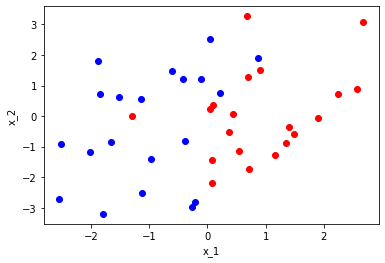

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=40, n_features=2, n_redundant=0, n_classes=2, random_state=1)
plt.plot(X[y==0, 0], X[y==0, 1], 'bo', X[y==1, 0], X[y==1, 1], 'ro')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()

Write a function that counts gini impurity for two class dataset.

In [2]:
import numpy as np

def gini_impurity(y):
  _, counts = np.unique(y, return_counts=True)
  P = counts[0]/np.sum(counts)
  return 2*P*(1 - P)

Calculate gini impurity for the whole dataset

In [3]:
gini_impurity(y)

0.5

$0.5$ means that both classes are equally in our dataset

We see from the visualization that class is more depend on $x_1$ feature than $x_2$. For simplisity let's try to classify data points using vertical line. Let's choose $x_1 = 1$ line

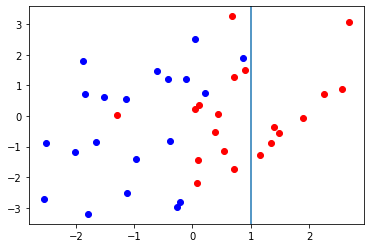

In [4]:
threshold = 1

plt.plot(X[y==0, 0], X[y==0, 1], 'bo', X[y==1, 0], X[y==1, 1], 'ro')
plt.axvline(x=threshold)
plt.show()

It's not a good division but on the right side we have only red points. Let's calculate gini impurity:

In [5]:
y_left = y[X[:, 0] < threshold] # left side
y_right = y[X[:, 0] >= threshold] # right side

# total impurity 
print("Total impurity: ", (len(y_left)*gini_impurity(y_left) + len(y_right)*gini_impurity(y_right))/(len(y)))

Total impurity:  0.375


Impurity value decreased a little bit. Let's try to improve our line

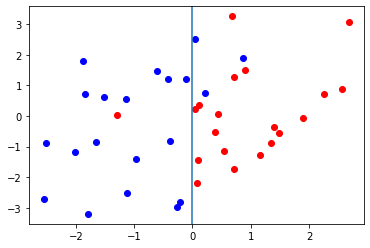

In [6]:
threshold = 0

plt.plot(X[y==0, 0], X[y==0, 1], 'bo', X[y==1, 0], X[y==1, 1], 'ro')
plt.axvline(x=threshold)
plt.show()

Division is much better

In [7]:
y_left = y[X[:, 0] < threshold] # left side
y_right = y[X[:, 0] >= threshold] # right side

# total impurity 
print("Total impurity: ", (len(y_left)*gini_impurity(y_left) + len(y_right)*gini_impurity(y_right))/(len(y)))

Total impurity:  0.17676767676767677


Impurity decreased

### information entropy

The second metric that is used very often to create a classification tree is information entropy. It's measurement of unpredictability. It tells us how unpredictable is the result of an event in particular situation.

In case of datasets event is to choose a data point randomly from a dataset and the result is - to which class does this point belong. If we have only one class in dataset, we know from which class will be each data point so everything is predictable and it doesn't give us any information so information entropy is $0$. As event becomes more unpredictable, information entropy increases.

Information entropy oof dataset is calculated like this:  
$$ H(D) = -\sum_{i=1}^{C} p_i \log_2 p_i $$  

$D$ is dataset, $C$ - number of classes, $p_i$ probability of getting $i$ data point.

To claculate what kind of division is better we calculate the same difference as we did for gini impurity: $H(D) - H(D|F)$, $F$ is feature(we devide data using this feature), $H(D|F)$ is information entropy of dataset. It's called as information gain as it tells us how much does $F$ feature gives us about dataset(about its class)

for example:  

| color        | radius     | class       |
| ----------- | ----------- | ----------- |
| red      | 2           | 0           |
| blue       | 1           | 0           |
| blue       | 3           | 1           |
| blue       | 5           | 1           |
| red      | 4           | 0           |
| blue       | 3           | 0           |
| red      | 2           | 1           |


$$ 
IG(D, color) = H(D) - \frac {3}{7} H(D| color=red) - 
\frac {4}{7} H(D| color=blue) = \\
= -\frac {4}{7} \log_2\frac {4}{7} - \frac {3}{7} \log_2\frac {3}{7} - \frac {3}{7}(-\frac {1}{3} \log_2\frac {1}{3} - \frac {2}{3} \log_2\frac {2}{3}) 
- \frac {4}{7}(-\frac {1}{2} \log_2\frac {1}{2} - \frac {1}{2} \log_2\frac {1}{2})
$$  

As we have $3$ red point out of $7$ and $4$ of them are blue, weights are $\frac {3}{7}$ and $\frac {4}{7}$, also only $1$ red point is in positive class out of $3$ abd $2$ out of $4$ from blues.

general formula for binary classification tree:

$$ IG(D, F) = H(D) - H(D|F) = 
H(D) - \bigg(\frac {N_{left}}{N_{left} + N_{right}} H(D_{left}) + \frac {N_{right}}{N_{left} + N_{right}} H(D_{right}) \bigg)$$  

$D_{left}$ and $D_{right}$ datasets in left and right leaves. So we got the same as we had for impurity, we should find the split that gives us the maximal information gain

Let's plot a graph of the dependence on the probability of a positive class of information entropy for a two-class dataset

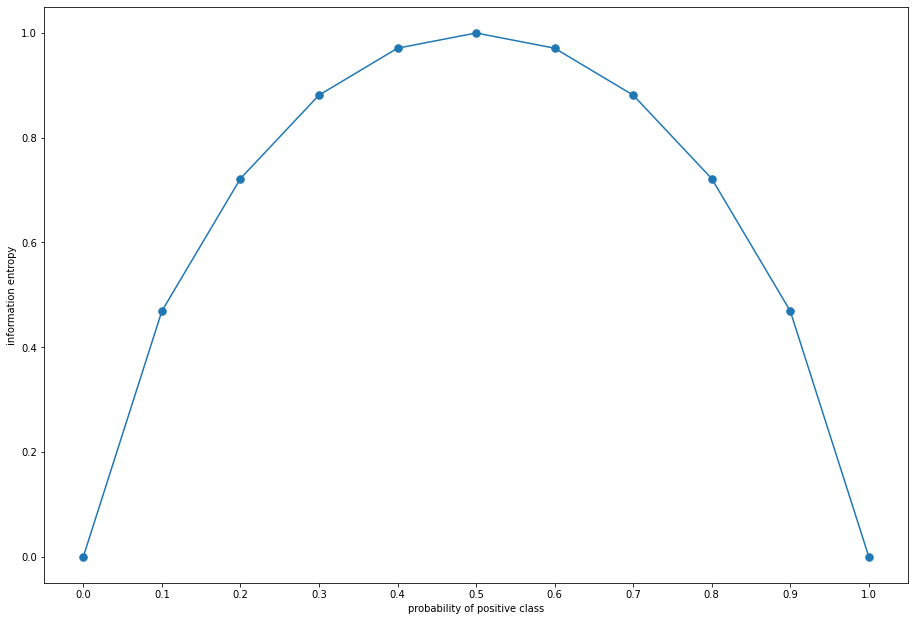

In [8]:
from math import log2
 
def entropy(events, ets=1e-15):
	return -sum([p * log2(p + ets) for p in events])  
 
# probabilities for positive class
probs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# probabilities for positive and negative classes 
dists = [[p, 1.0 - p] for p in probs]

# calculate information entropy for each probability distribution
ents = [entropy(d) for d in dists]

# plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_axes((0, 0, 1, 1))
ax.plot(probs, ents, marker='.', markersize=15)
ax.set_xticks(probs)
ax.set_xticklabels([str(p) for p in probs])
ax.set_xlabel('probability of positive class')
ax.set_ylabel('information entropy')
plt.show()

We see that information entropy is bigger for balanced dataset

__How do we generate possible splits of leaf(from this splits we choose the best using gini impurity or information entropy)__

So how do we choose the questions for nodes? We can create a list of possible questions and we can choose from a set of questions that aren't already used to reach this leaf from the root(for different subtrees we can have the same questions). Each feature creates at least $1$ question. In case of binary tree we only have yes/no questions:
 
* For categorical features it's too easy - it generates n questions where n is number of categories (exception - sometimes $2$ category generates $1$ question). If we have 2 possible colors - red, green and blue, questions will be:
    * is color red?
    * is color green?
    * is color blue?     
* For numerical features data points are sorted(feature ascending) and they take average of two neighbours and this will be split points so if we have $n$ unique data point, we'll get $n-1$ split point. If we have balls with radiuses $1, 4, 5, 7, 11$, questions will be:
    * radius $\leq 2.5 ?$
    * radius $\leq 4.5 ?$
    * radius $\leq 6 ?$
    * radius $\leq 9 ?$   

> But when we have lots of data points, this method generates too much questions so very often we just choose some percentiles like $20\%, 40\%, 60\%, 80\%$

### Implementation of Classification Tree using sklearn

We can solve classification problem using classification tree and we can use `DecisionTreeClassifier` class from `sklearn.tree` module for that. We can pass lots of parameters to instance of `DecisionTreeClassifier` class:

*   `criterion` - sth that measures how good is split: `gini` or `entropy`. default is gini impurity as it's faster and the result is the same mostly.

*   `max_depth` - the longest path length from root to leaf

*   `min_samples_split` - Minimum number of data point in leaf when we can do a split operation. If it is fixed value than we can pass `int` or we can pass `float` in range of $0$ - $1$(if we want to be depend on number of rows in dataset and in such case quantity is `ceil(min_samples_split * n_samples)`)`

*   `min_samples_leaf` - Minimum number of data points in a leaf, if we'll have less data points in a leaf than this number after any split, this split is forbidden. We can pass this number as `int` or `float`(the same logic as above)

*   `max_features` - During each split model will randomly choose `max_features`feature and chooses the best. It can be `int` or `float`(same logic as above) or `“sqrt”`, `“log2”`, `None` that are sqrt(num_features), log(numm_features) or num_features.

*   `max_leaf_nodes` - maximum number of leaves

*   `min_impurity_decrease` - delta impurity should be at least `min_impurity_decrease` to split, else split is forbidden:  
$$
\frac{N_{node}}{N}(G_{node}-\frac{N_{right}}{N_{node}}G_{right}-\frac{N_{left}}{N_{node}}G_{left}) \geq \delta
$$
$N_{node}$, $G_{node}$ number of data points and impurity in a node and $N_{right/ left}$, $G_{right/ left}$ are the same values after split for left and right sides and $N$ is number of rows in data.


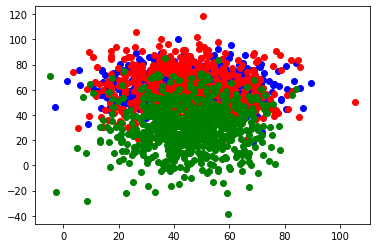

In [9]:
X, y = make_classification(n_samples=2000, n_classes=3, n_features=6, n_redundant=0, 
                           n_clusters_per_class=1, shift=3, scale=15, random_state=1)

plt.plot(X[y==0, 0], X[y==0, 4], 'bo',
            X[y==1, 0], X[y==1, 4], 'ro',
            X[y==2, 0], X[y==2, 4], 'go')

plt.show()

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)
print('Train score: {}\nTest score: {}'.format(dtc.score(X_train, y_train), dtc.score(X_test, y_test)))

Train score: 1.0
Test score: 0.8275


We have $100\%$ accuracy on training set, this is overfitting, this happened because we didn't stop creating a tree before we get only one data point in each leaf. Try to add regularization:

In [12]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(min_samples_split=50)

dtc.fit(X_train, y_train)
print('Train score: {}\nTest score: {}'.format(dtc.score(X_train, y_train), dtc.score(X_test, y_test)))

Train score: 0.909375
Test score: 0.8625


Much better result

In [13]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy', min_samples_split=50)

dtc.fit(X_train, y_train)
print('Train score: {}\nTest score: {}'.format(dtc.score(X_train, y_train), dtc.score(X_test, y_test)))

Train score: 0.916875
Test score: 0.875


changing gini impurity with entropy got us better result

In [14]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.003)

dtc.fit(X_train, y_train)
print('Train score: {}\nTest score: {}'.format(dtc.score(X_train, y_train), dtc.score(X_test, y_test)))

Train score: 0.921875
Test score: 0.88


We can use `plot_tree()` function from `sklearn.tree` module for visualization

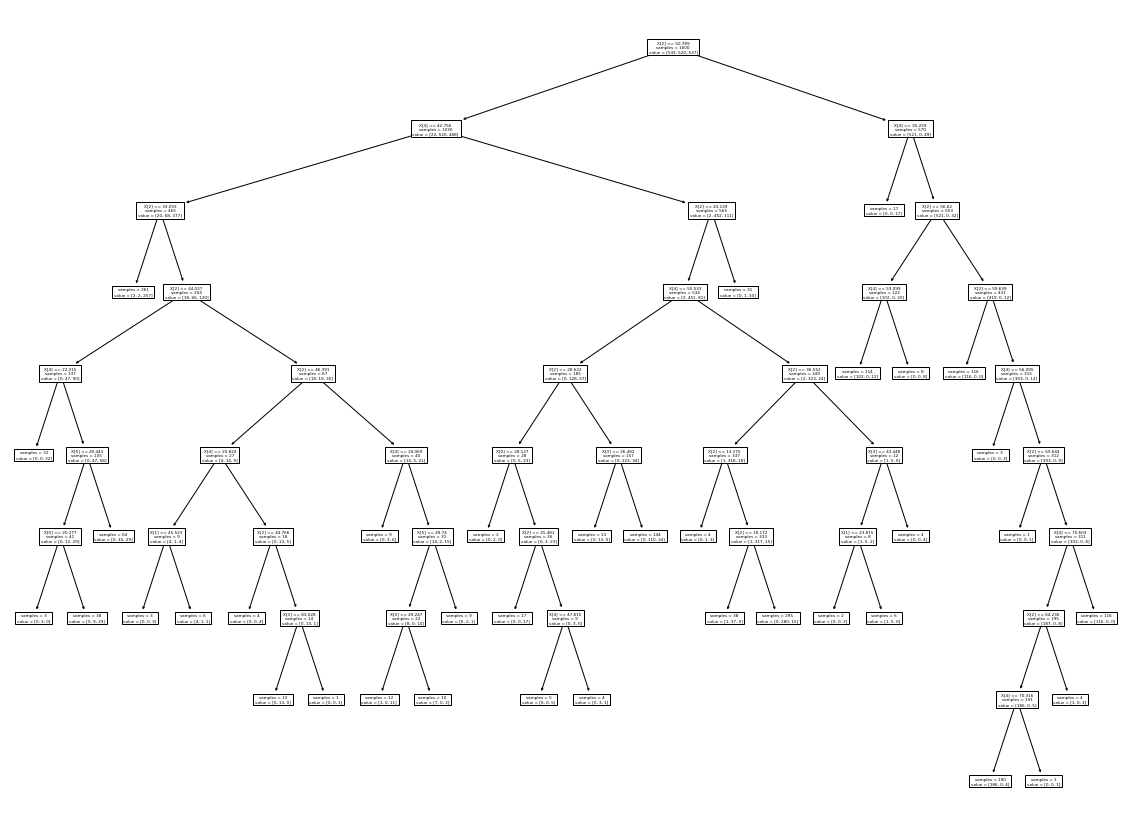

In [15]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(20, 15))
plot_tree(dtc, impurity=False)
plt.show()

We can't see what's written in nodes so let's try to use `max_depth` parameter, we won't see al leaves but we'll see what's written in nodes

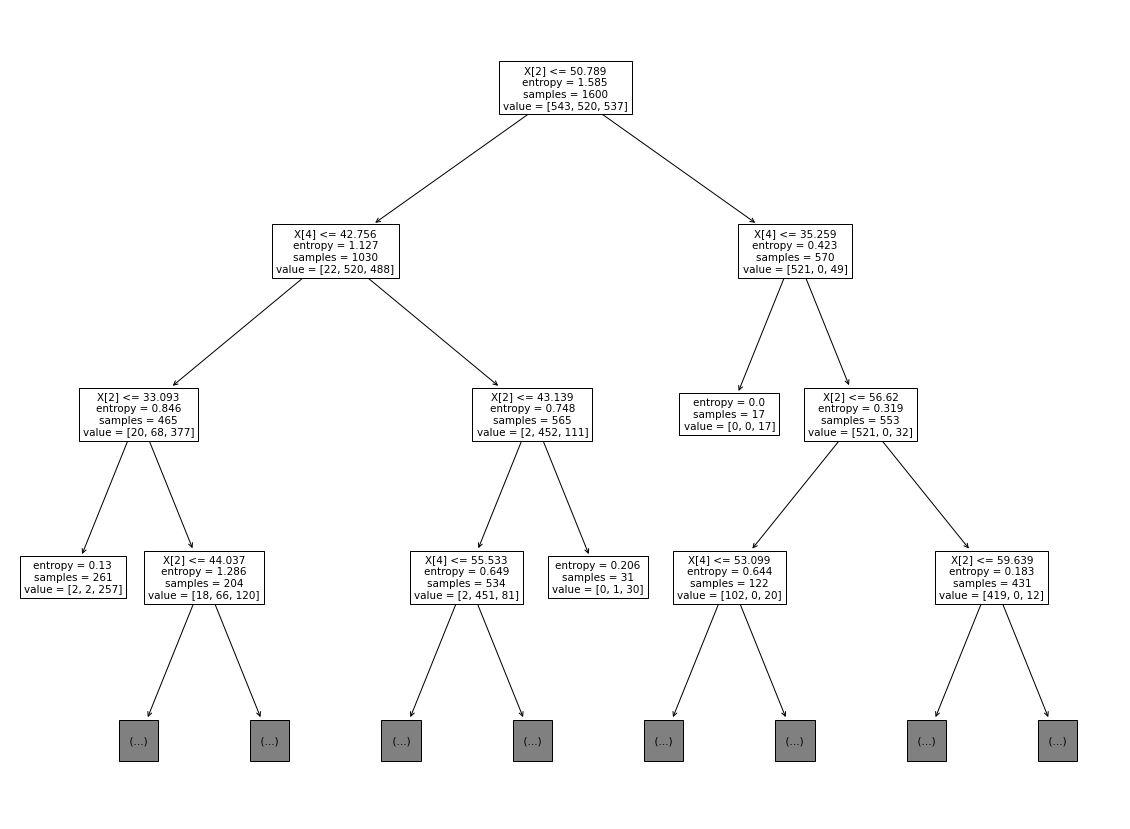

In [16]:
fig = plt.figure(figsize=(20, 15))
plot_tree(dtc, max_depth=3)
plt.show()

information each node: 
* how do we split the node
* number of trainind points in each node
* number of each class points 

## Regression Tree

There are some differences between classification and regression trees.  

Regression tree can't use gini impurity or information entropy because both of them works for categorical/discrete target values. We need some different metric that works for continuous variables. Sklearn offers three options:
* MSE - Mean Squared Error. Leaf returns average of its points:
$$MSE(L) = \frac {1}{N_L} \sum_{i \in L} (y_i - \mu_L)^2 $$   
$N_L$ - number of data points in $L$ leaf, $y_i$ - real reasult of $i$th point, $\mu_L$ result of $L$ leaf
MSE of a whole tree: 
$$MSE(Tree) = \sum_{L \in Tree} \frac {N_L}{N}MSE(L) $$  
$N$ - number of points.  
We should choose the split that minimises $MSE(Tree)$

* MAE - Mean absolute value. Leaf returns meadian of its points:
$$MAE(L) = \frac {1}{N_L} \sum_{i \in L} |y_i - m_L| $$   
$N_L$ - number of data points in $L$ leaf, $y_i$ - real reasult of $i$th point, $y_i$ - real reasult of $i$th point, ხოლო $m_L$ $L$ - result of $L$ leaf
MASE of whole tree:
$$MAE(Tree) = \sum_{L \in Tree} \frac {N_L}{N}MAE(L) $$  
$N$ - number of points.  
We should choose the split that minimises $MAE(Tree)$

* Friedman_MSE

Let's look at example using `sklearn.tree`-ს `DecisionTreeRegressor`

Let's use [Diabet Dataset](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html) from `sklearn.datasets`

In [17]:
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor

X, y = load_diabetes(return_X_y=True)

X.shape, y.shape

((442, 10), (442,))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3)

In [19]:
from sklearn.preprocessing import StandardScaler

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [20]:
dtr = DecisionTreeRegressor(random_state=0)

dtr.fit(X_train, y_train)

print('R2 score train: {}\nR2 score test: {}'.
      format(dtr.score(X_train, y_train), dtr.score(X_test, y_test)))

R2 score train: 1.0
R2 score test: 0.029904099090375058


Without regularization we still have overfit

In [21]:
dtr = DecisionTreeRegressor(min_samples_leaf=25, max_leaf_nodes=15, random_state=0)

dtr.fit(X_train, y_train)

print('R2 score train: {}\nR2 score test: {}'.
      format(dtr.score(X_train, y_train), dtr.score(X_test, y_test)))

R2 score train: 0.5331040167325479
R2 score test: 0.4181146146247906


[]

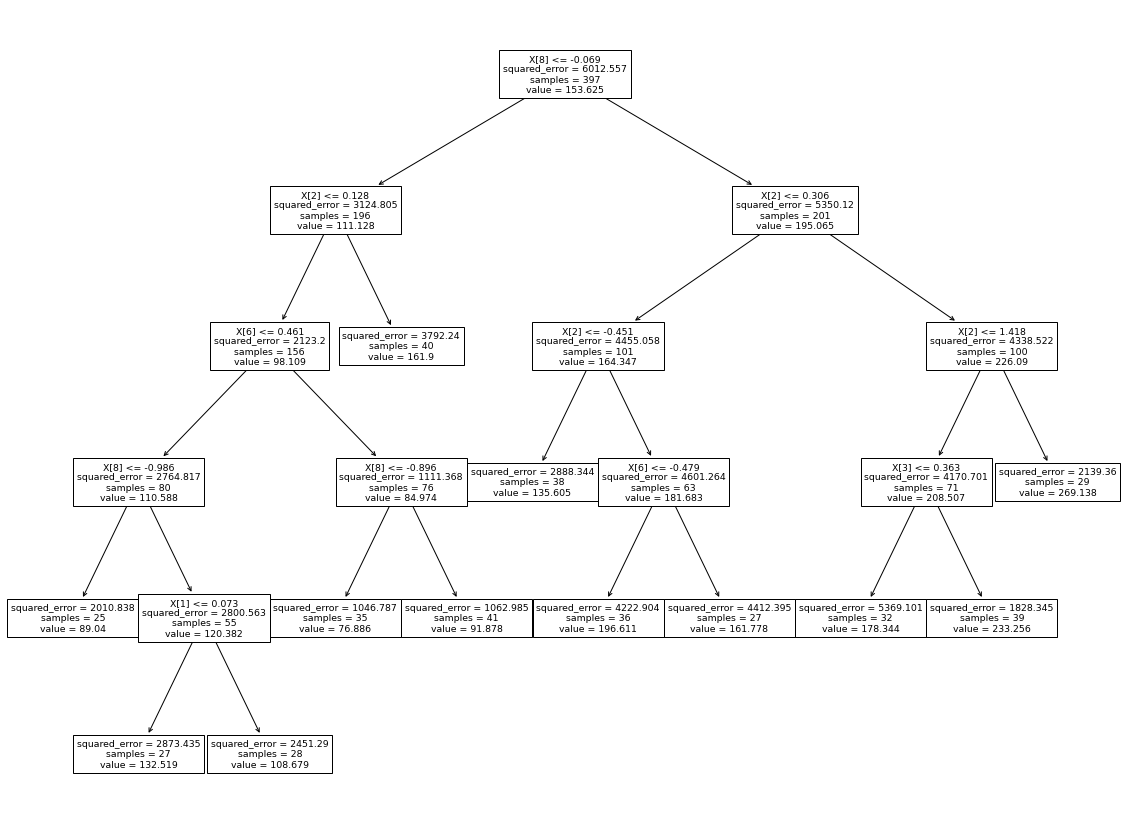

In [22]:
fig = plt.figure(figsize=(20,15))
plot_tree(dtr, )

plt.plot()

Pros of decision trees:

*  Data needs less preprocessing
*  Convenient for Multioutput problems.
*  White box - We know precisely how we got the result for each point

Cons:

*  Decision trees aren't stable always. We may create several trees for the same dataset and we may get different trees